In [1]:
##Importing data

In [2]:
import pandas as pd

data = pd.read_csv('mrip_catch_snapshot.csv', header=0)
print(data.head())

  Estimate Status  Year         Wave Fishing Mode Fishing Area  \
0           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
1           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
2           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
3           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
4           FINAL  2010  MARCH/APRIL        SHORE       INLAND   

          Species Group             Sub Group  Observed Harvest (A)   PSE  \
0  CARTILAGINOUS FISHES           SKATES/RAYS                     0     .   
1             CATFISHES  FRESHWATER CATFISHES                 35600  63.5   
2          OTHER FISHES          OTHER FISHES                 53567  60.7   
3      TEMPERATE BASSES          STRIPED BASS                     0     .   
4      TEMPERATE BASSES           WHITE PERCH               1313617  60.8   

   Reported Harvest (B1) PSE.1  Released Alive (B2)  PSE.2  
0                      0     .                10143  105.8  
1                 

In [3]:
catch_effort = pd.read_csv('mrip_effort_series.csv', header=0)
print(catch_effort.head())

  Estimate Status  Year         Wave  Fishing Mode     Fishing Area  \
0           FINAL  2010  MARCH/APRIL         SHORE  OCEAN (<= 3 MI)   
1           FINAL  2010  MARCH/APRIL         SHORE           INLAND   
2           FINAL  2010  MARCH/APRIL    PARTY BOAT   OCEAN (> 3 MI)   
3           FINAL  2010  MARCH/APRIL    PARTY BOAT           INLAND   
4           FINAL  2010  MARCH/APRIL  CHARTER BOAT   OCEAN (> 3 MI)   

   Angler Trips    PSE  
0          4436  109.6  
1        730139   19.1  
2           788    8.6  
3             2    8.6  
4             7   17.3  


In [4]:
df = pd.merge(data, catch_effort, how='left', on=['Year', 'Wave', 'Fishing Mode', 'Fishing Area'])
df

,Estimate Status_x,Year,Wave,Fishing Mode,Fishing Area,Species Group,Sub Group,Observed Harvest (A),PSE_x,Reported Harvest (B1),PSE.1,Released Alive (B2),PSE.2,Estimate Status_y,Angler Trips,PSE_y
0,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,0,.,0,.,10143,105.8,FINAL,730139,19.1
1,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,35600,63.5,0,.,60656,68.6,FINAL,730139,19.1
2,FINAL,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,53567,60.7,0,.,284146,58.3,FINAL,730139,19.1
3,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,0,.,0,.,714968,84.8,FINAL,730139,19.1
4,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,1313617,60.8,0,.,1302508,82.8,FINAL,730139,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,OTHER FISHES,OTHER FISHES,14682,57.5,0,.,298869,18.8,FINAL,225163,21.8
2844,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,STRIPED BASS,87647,35.1,31024,38.9,449166,28.8,FINAL,225163,21.8
2845,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,WHITE PERCH,30297,64.3,31248,82.7,95671,45.6,FINAL,225163,21.8
2846,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TOADFISHES,TOADFISHES,0,.,0,.,763,69.7,FINAL,225163,21.8


In [5]:
df.rename(columns = {'Observed Harvest (A)':'A', 'Reported Harvest (B1)':'B1', 'Released Alive (B2)':'B2'}, inplace = True) 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estimate Status_x  2848 non-null   object
 1   Year               2848 non-null   int64 
 2   Wave               2848 non-null   object
 3   Fishing Mode       2848 non-null   object
 4   Fishing Area       2848 non-null   object
 5   Species Group      2848 non-null   object
 6   Sub Group          2848 non-null   object
 7   A                  2848 non-null   int64 
 8   PSE_x              2848 non-null   object
 9   B1                 2848 non-null   int64 
 10  PSE.1              2848 non-null   object
 11  B2                 2848 non-null   int64 
 12  PSE.2              2848 non-null   object
 13  Estimate Status_y  2848 non-null   object
 14  Angler Trips       2848 non-null   int64 
 15  PSE_y              2848 non-null   object
dtypes: int64(5), object(11)
memory usage: 378.

In [7]:
## Eploring data...

#Columns: Year - Year
#    Wave - 2 month period 
#   Fishing Mode - where fishing took place (from shore or type of boat)
#   Fishing Area - inland (but not freshwater), near-shore (within 3 miles of shore), and off-shore (over 3 miles from shore)
#   Species Group - Type of fish
#   Subgroup - More specific description of fish
#   A - Observed Harvest - NOAA official observed
#   PSE - Percent standard error. Error over 50 indicates a pretty unreliable number
#   B1 - Reported Harvest - Fisher reported but was not observed by NOAA
#   B2 - Released Alive - fish were caught and released
#   Angler Trips - number of trips reported to NOAA 
#   PSE_y - Percent standard error in angler trip number

In [8]:
df['total'] = df.A + df.B1 + df.B2
#Total - Observed Harvest + Reported Harvest + Released Alive
df

,Estimate Status_x,Year,Wave,Fishing Mode,Fishing Area,Species Group,Sub Group,A,PSE_x,B1,PSE.1,B2,PSE.2,Estimate Status_y,Angler Trips,PSE_y,total
0,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,0,.,0,.,10143,105.8,FINAL,730139,19.1,10143
1,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,35600,63.5,0,.,60656,68.6,FINAL,730139,19.1,96256
2,FINAL,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,53567,60.7,0,.,284146,58.3,FINAL,730139,19.1,337713
3,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,0,.,0,.,714968,84.8,FINAL,730139,19.1,714968
4,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,1313617,60.8,0,.,1302508,82.8,FINAL,730139,19.1,2616125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,OTHER FISHES,OTHER FISHES,14682,57.5,0,.,298869,18.8,FINAL,225163,21.8,313551
2844,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,STRIPED BASS,87647,35.1,31024,38.9,449166,28.8,FINAL,225163,21.8,567837
2845,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,WHITE PERCH,30297,64.3,31248,82.7,95671,45.6,FINAL,225163,21.8,157216
2846,FINAL,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TOADFISHES,TOADFISHES,0,.,0,.,763,69.7,FINAL,225163,21.8,763


In [9]:
df.drop(columns=['Estimate Status_x', 'Estimate Status_y'])
#dropping columns with no use

,Year,Wave,Fishing Mode,Fishing Area,Species Group,Sub Group,A,PSE_x,B1,PSE.1,B2,PSE.2,Angler Trips,PSE_y,total
0,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,0,.,0,.,10143,105.8,730139,19.1,10143
1,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,35600,63.5,0,.,60656,68.6,730139,19.1,96256
2,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,53567,60.7,0,.,284146,58.3,730139,19.1,337713
3,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,0,.,0,.,714968,84.8,730139,19.1,714968
4,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,1313617,60.8,0,.,1302508,82.8,730139,19.1,2616125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,OTHER FISHES,OTHER FISHES,14682,57.5,0,.,298869,18.8,225163,21.8,313551
2844,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,STRIPED BASS,87647,35.1,31024,38.9,449166,28.8,225163,21.8,567837
2845,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TEMPERATE BASSES,WHITE PERCH,30297,64.3,31248,82.7,95671,45.6,225163,21.8,157216
2846,2019,NOVEMBER/DECEMBER,PRIVATE/RENTAL BOAT,INLAND,TOADFISHES,TOADFISHES,0,.,0,.,763,69.7,225163,21.8,763


In [10]:
#average number of each fish caught
print(df.groupby(['Species Group', 'Year'])[['total']].mean())


                           total
Species Group Year              
BLUEFISH      2010  59604.181818
              2011  93045.526316
              2012  54356.875000
              2013  60151.000000
              2014  59101.666667
...                          ...
WRASSES       2015  35006.750000
              2016  44502.083333
              2017  48778.062500
              2018  19446.750000
              2019  55602.846154

[202 rows x 1 columns]


In [11]:
means = df.groupby(['Fishing Mode', 'Species Group'])['total'].mean()
means



Fishing Mode  Species Group           
CHARTER BOAT  BLUEFISH                     13404.000000
              CARTILAGINOUS FISHES          1495.862069
              CATFISHES                     1595.111111
              CODS AND HAKES                 755.500000
              DOLPHINS                      2377.312500
                                              ...      
SHORE         SEAROBINS                    53920.800000
              TEMPERATE BASSES            743163.018349
              TOADFISHES                   42617.208333
              TRIGGERFISHES/FILEFISHES     18578.000000
              WRASSES                     110915.551724
Name: total, Length: 81, dtype: float64

In [12]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

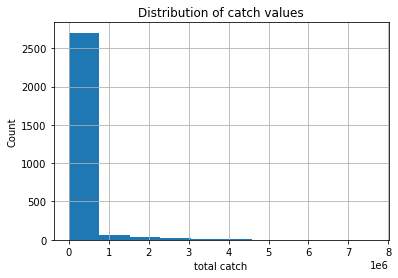

In [13]:
df.total.hist(bins = 10)
plt.xlabel('total catch')
plt.ylabel('Count')
plt.title('Distribution of catch values');

In [14]:
df.total.describe()

count    2.848000e+03
mean     1.599457e+05
std      5.131743e+05
min      0.000000e+00
25%      5.690000e+02
50%      6.299500e+03
75%      6.777200e+04
max      7.622662e+06
Name: total, dtype: float64

In [15]:
df['Fishing Area'].unique()

array(['INLAND', 'OCEAN (> 3 MI)', 'OCEAN (<= 3 MI)'], dtype=object)

In [16]:
df['Species Group'].unique()

array(['CARTILAGINOUS FISHES', 'CATFISHES', 'OTHER FISHES',
       'TEMPERATE BASSES', 'CODS AND HAKES', 'EELS', 'SEA BASSES',
       'WRASSES', 'FLOUNDERS', 'HERRINGS', 'BLUEFISH', 'PUFFERS', 'DRUMS',
       'TOADFISHES', 'SEAROBINS', 'DOLPHINS', 'TUNAS AND MACKERELS',
       'JACKS', 'PORGIES', 'TRIGGERFISHES/FILEFISHES', 'GRUNTS',
       'SCULPINS'], dtype=object)

In [17]:
df['Sub Group'].unique()

array(['SKATES/RAYS', 'FRESHWATER CATFISHES', 'OTHER FISHES',
       'STRIPED BASS', 'WHITE PERCH', 'ATLANTIC COD', 'EELS',
       'BLACK SEA BASS', 'CUNNER', 'TAUTOG', 'SUMMER FLOUNDER',
       'HERRINGS', 'BLUEFISH', 'DOGFISH SHARKS', 'OTHER SHARKS',
       'PUFFERS', 'ATLANTIC CROAKER', 'SPOT', 'TOADFISHES', 'SEAROBINS',
       'DOLPHINS', 'OTHER TUNAS/MACKERELS', 'KINGFISHES', 'WEAKFISH',
       'RED HAKE', 'GREATER AMBERJACK', 'SPANISH MACKEREL', 'BLACK DRUM',
       'RED DRUM', 'SHEEPSHEAD', 'SCUP', 'TRIGGERFISHES/FILEFISHES',
       'LITTLE TUNNY/ATLANTIC BONITO', 'SPOTTED SEATROUT', 'PIGFISH',
       'ATLANTIC MACKEREL', 'SILVER PERCH', 'OTHER CODS/HAKES', 'POLLOCK',
       'OTHER FLOUNDERS', 'PINFISHES', 'SCULPINS', 'EPINEPHELUS GROUPERS',
       'OTHER SEA BASSES', 'OTHER PORGIES', 'MYCTEROPERCA GROUPERS',
       'SOUTHERN FLOUNDER', 'OTHER TEMPERATE BASSES', 'OTHER JACKS',
       'WINTER FLOUNDER', 'OTHER DRUM', 'KING MACKEREL',
       'FLORIDA POMPANO', 'OTHER GRUNTS'], dty

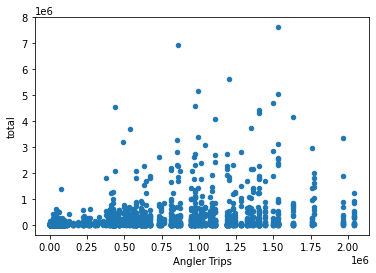

In [18]:
df.plot(x='Angler Trips', y='total', kind='scatter');

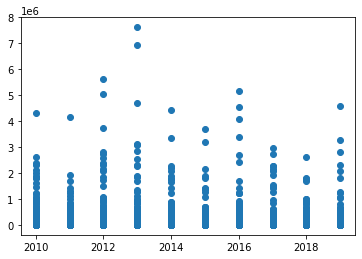

In [19]:
plt.scatter(df.Year, df.total)

In [20]:
df.rename(columns={"Species Group": "SpecGroup", "Sub Group": "SubGroup"}, inplace=True)

In [21]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Estimate Status_x,0,0.0
Angler Trips,0,0.0
Estimate Status_y,0,0.0
PSE.2,0,0.0
B2,0,0.0
PSE.1,0,0.0
B1,0,0.0
PSE_y,0,0.0
PSE_x,0,0.0
SubGroup,0,0.0


In [22]:
df[df['SpecGroup'] == 'Drums']

,Estimate Status_x,Year,Wave,Fishing Mode,Fishing Area,SpecGroup,SubGroup,A,PSE_x,B1,PSE.1,B2,PSE.2,Estimate Status_y,Angler Trips,PSE_y,total


In [23]:
df['SpecGroup'].value_counts()

DRUMS                       529
TEMPERATE BASSES            348
CARTILAGINOUS FISHES        272
FLOUNDERS                   219
SEA BASSES                  190
BLUEFISH                    185
OTHER FISHES                156
WRASSES                     125
TUNAS AND MACKERELS         109
CATFISHES                   105
SEAROBINS                   103
TOADFISHES                  100
EELS                         67
PUFFERS                      66
HERRINGS                     65
CODS AND HAKES               55
PORGIES                      54
DOLPHINS                     40
TRIGGERFISHES/FILEFISHES     32
GRUNTS                       14
JACKS                        13
SCULPINS                      1
Name: SpecGroup, dtype: int64

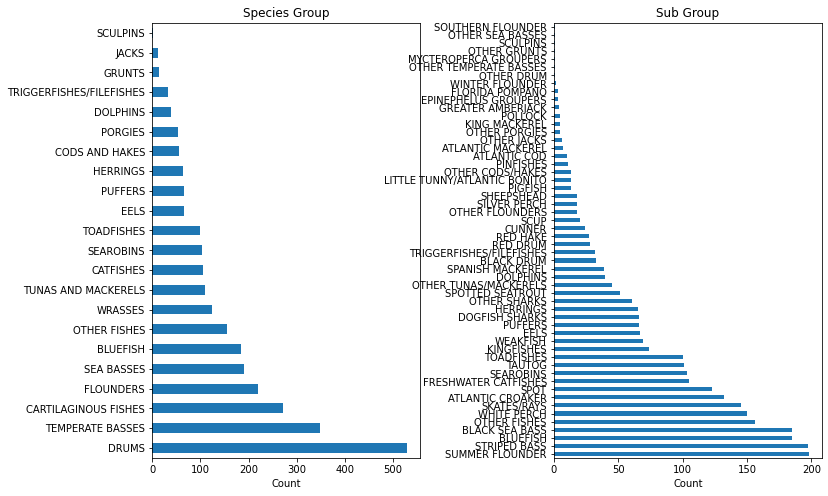

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.SpecGroup.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Species Group')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.SubGroup.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('Sub Group')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);


In [25]:
means2 = df.groupby(['Fishing Mode', 'SpecGroup'])['total'].mean()
means2


Fishing Mode  SpecGroup               
CHARTER BOAT  BLUEFISH                     13404.000000
              CARTILAGINOUS FISHES          1495.862069
              CATFISHES                     1595.111111
              CODS AND HAKES                 755.500000
              DOLPHINS                      2377.312500
                                              ...      
SHORE         SEAROBINS                    53920.800000
              TEMPERATE BASSES            743163.018349
              TOADFISHES                   42617.208333
              TRIGGERFISHES/FILEFISHES     18578.000000
              WRASSES                     110915.551724
Name: total, Length: 81, dtype: float64

In [26]:
#seaborn. look at examples and sub in your colums. try logistical regression, random forest, then cluster. jump ahead to machine learning section.

In [27]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans

In [28]:
df.head()

,Estimate Status_x,Year,Wave,Fishing Mode,Fishing Area,SpecGroup,SubGroup,A,PSE_x,B1,PSE.1,B2,PSE.2,Estimate Status_y,Angler Trips,PSE_y,total
0,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,0,.,0,.,10143,105.8,FINAL,730139,19.1,10143
1,FINAL,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,35600,63.5,0,.,60656,68.6,FINAL,730139,19.1,96256
2,FINAL,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,53567,60.7,0,.,284146,58.3,FINAL,730139,19.1,337713
3,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,0,.,0,.,714968,84.8,FINAL,730139,19.1,714968
4,FINAL,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,1313617,60.8,0,.,1302508,82.8,FINAL,730139,19.1,2616125


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estimate Status_x  2848 non-null   object
 1   Year               2848 non-null   int64 
 2   Wave               2848 non-null   object
 3   Fishing Mode       2848 non-null   object
 4   Fishing Area       2848 non-null   object
 5   SpecGroup          2848 non-null   object
 6   SubGroup           2848 non-null   object
 7   A                  2848 non-null   int64 
 8   PSE_x              2848 non-null   object
 9   B1                 2848 non-null   int64 
 10  PSE.1              2848 non-null   object
 11  B2                 2848 non-null   int64 
 12  PSE.2              2848 non-null   object
 13  Estimate Status_y  2848 non-null   object
 14  Angler Trips       2848 non-null   int64 
 15  PSE_y              2848 non-null   object
 16  total              2848 non-null   int64 


In [30]:
#transform 'Fishing Mode' and 'Fishing Area' colums into numerical values
le = LabelEncoder().fit(df['Fishing Mode'])
df['Fishing Mode'] = le.transform(df['Fishing Mode'])

ld = LabelEncoder().fit(df['Fishing Area'])
df['Fishing Area'] = ld.transform(df['Fishing Area'])

ls = LabelEncoder().fit(df['SpecGroup'])
df['SpecGroup'] = ls.transform(df['SpecGroup'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estimate Status_x  2848 non-null   object
 1   Year               2848 non-null   int64 
 2   Wave               2848 non-null   object
 3   Fishing Mode       2848 non-null   int32 
 4   Fishing Area       2848 non-null   int32 
 5   SpecGroup          2848 non-null   int32 
 6   SubGroup           2848 non-null   object
 7   A                  2848 non-null   int64 
 8   PSE_x              2848 non-null   object
 9   B1                 2848 non-null   int64 
 10  PSE.1              2848 non-null   object
 11  B2                 2848 non-null   int64 
 12  PSE.2              2848 non-null   object
 13  Estimate Status_y  2848 non-null   object
 14  Angler Trips       2848 non-null   int64 
 15  PSE_y              2848 non-null   object
 16  total              2848 non-null   int64 


In [31]:
#tried to make a dictionary to show the old name of 'Fishing Area : New Key, but it's not working
L = list(ls.inverse_transform(df['SpecGroup']))
d = dict(zip(ls.classes_, ls.transform(ls.classes_)))
print (d)

{'BLUEFISH': 0, 'CARTILAGINOUS FISHES': 1, 'CATFISHES': 2, 'CODS AND HAKES': 3, 'DOLPHINS': 4, 'DRUMS': 5, 'EELS': 6, 'FLOUNDERS': 7, 'GRUNTS': 8, 'HERRINGS': 9, 'JACKS': 10, 'OTHER FISHES': 11, 'PORGIES': 12, 'PUFFERS': 13, 'SCULPINS': 14, 'SEA BASSES': 15, 'SEAROBINS': 16, 'TEMPERATE BASSES': 17, 'TOADFISHES': 18, 'TRIGGERFISHES/FILEFISHES': 19, 'TUNAS AND MACKERELS': 20, 'WRASSES': 21}


In [32]:
#tried to make a dictionary to show the old name of 'Fishing Area : New Key, but it's not working
L = list(ld.inverse_transform(df['Fishing Area']))
d = dict(zip(ld.classes_, ld.transform(ld.classes_)))
print (d)

{'INLAND': 0, 'OCEAN (<= 3 MI)': 1, 'OCEAN (> 3 MI)': 2}


In [33]:
L = list(le.inverse_transform(df['Fishing Mode']))
d = dict(zip(le.classes_, le.transform(le.classes_)))
print (d)

{'CHARTER BOAT': 0, 'PARTY BOAT': 1, 'PRIVATE/RENTAL BOAT': 2, 'SHORE': 3}


C:\Users\hindm\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='total'>

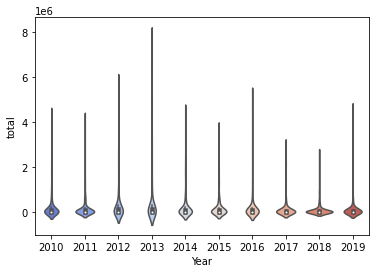

In [34]:
#violin plot
sns.violinplot('Year','total',data=df,palette='coolwarm')

<AxesSubplot:xlabel='Year', ylabel='count'>

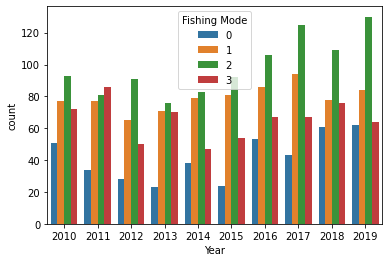

In [35]:
#I think this is a useless graph. count plot of fishing mode in each year. but the counts in the dataframe each have their own number of trips recorded?
sns.countplot(x='Year',hue='Fishing Mode',data=df)

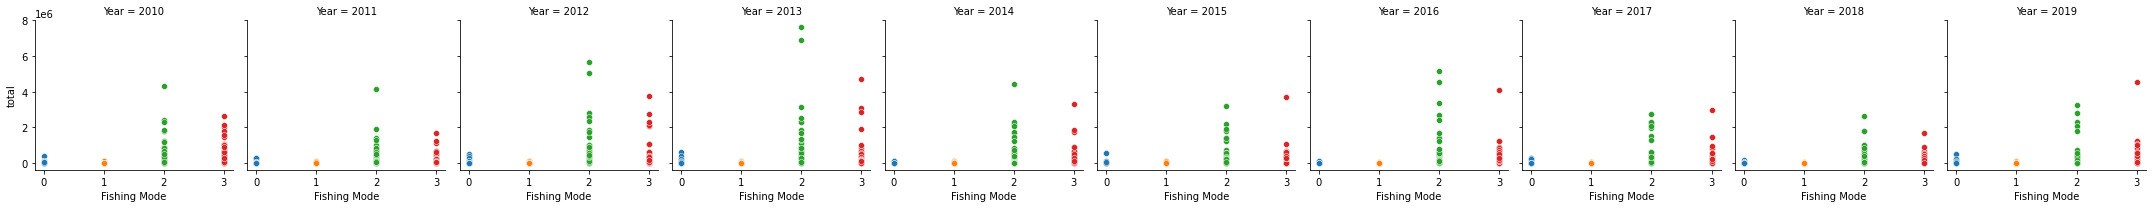

In [36]:
g = sns.FacetGrid(col='Year',hue='Fishing Mode',data=df,legend_out=False)
g.map(sns.scatterplot,'Fishing Mode','total')

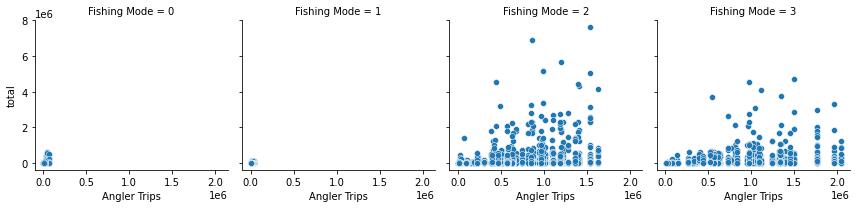

In [37]:
g = sns.FacetGrid(col='Fishing Mode',data=df,legend_out=False)
g.map(sns.scatterplot,'Angler Trips','total')

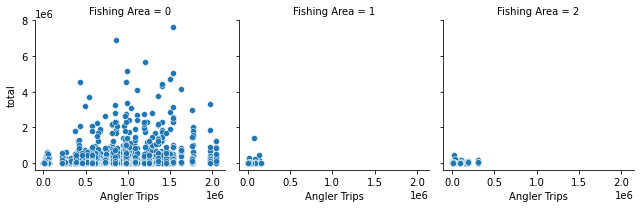

In [38]:
g = sns.FacetGrid(col='Fishing Area',data=df,legend_out=False)
g.map(sns.scatterplot,'Angler Trips','total')

C:\Users\hindm\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SpecGroup', ylabel='total'>

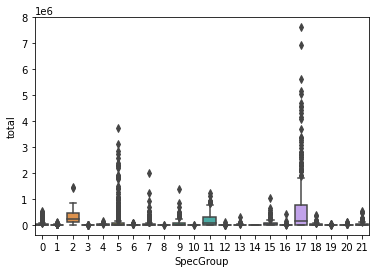

In [39]:
sns.boxplot('SpecGroup','total',data=df)

In [40]:
#Should I drop fishing area 0? And Fishing modes 0 and 1? How do I figure out for sure which ones those area because my 
#revers transform dict didnt work.
#Also, how can I break out the histograms for each species group? Group 17 aka Temperate Basses overwhelms the other types
#of fish caught.

<AxesSubplot:xlabel='total'>

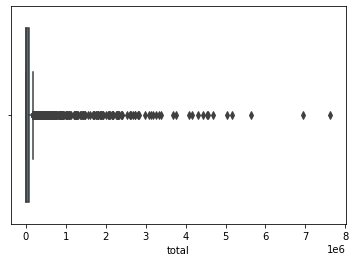

In [41]:
sns.boxplot(x=df['total'])

C:\Users\hindm\Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0.0, 1000000.0)

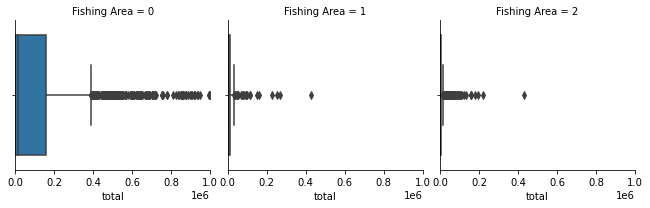

In [42]:
g = sns.FacetGrid(col='Fishing Area',data=df,legend_out=False)
g.map(sns.boxplot,'total')
plt.xlim(0, 1000000)

In [43]:
#looking for an outlier using z-score
from scipy import stats
z = np.abs(stats.zscore(df['total']))
print(z)

[0.29196507 0.12413102 0.34646815 ... 0.00532011 0.31024667 0.27825582]


In [44]:
#set threshold to 3 std deviations
threshold = 3
print(np.where(z > 3))

(array([   4,   68,   90,   94,  149,  152,  160,  182,  260,  459,  543,
        598,  644,  654,  662,  712,  722,  723,  733,  734,  781,  791,
        792,  841,  866,  867,  875,  886,  888,  894,  941,  944,  952,
        953, 1065, 1106, 1123, 1130, 1192, 1194, 1205, 1264, 1296, 1434,
       1512, 1513, 1540, 1570, 1623, 1624, 1723, 1724, 1852, 1938, 1954,
       2026, 2030, 2042, 2043, 2182, 2364, 2365, 2504, 2698, 2711, 2712,
       2727, 2805, 2806], dtype=int64),)


C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

(0.0, 1000000.0)

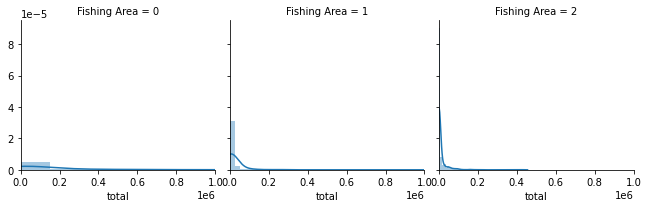

In [45]:
g = sns.FacetGrid(col='Fishing Area',data=df,legend_out=False)
g.map(sns.distplot,'total')
plt.xlim(0, 1000000)

In [46]:
#Total catch varies such a large amount. I'm going to incorporate a catch per trip column, which divides the total catch
#by the number of angler trips recorded.

df['CatchPerTrip'] = np.where(df['total'] < 1, df['total'], df['total']/df['Angler Trips'])
df.head()

,Estimate Status_x,Year,Wave,Fishing Mode,Fishing Area,SpecGroup,SubGroup,A,PSE_x,B1,PSE.1,B2,PSE.2,Estimate Status_y,Angler Trips,PSE_y,total,CatchPerTrip
0,FINAL,2010,MARCH/APRIL,3,0,1,SKATES/RAYS,0,.,0,.,10143,105.8,FINAL,730139,19.1,10143,0.013892
1,FINAL,2010,MARCH/APRIL,3,0,2,FRESHWATER CATFISHES,35600,63.5,0,.,60656,68.6,FINAL,730139,19.1,96256,0.131832
2,FINAL,2010,MARCH/APRIL,3,0,11,OTHER FISHES,53567,60.7,0,.,284146,58.3,FINAL,730139,19.1,337713,0.462532
3,FINAL,2010,MARCH/APRIL,3,0,17,STRIPED BASS,0,.,0,.,714968,84.8,FINAL,730139,19.1,714968,0.979222
4,FINAL,2010,MARCH/APRIL,3,0,17,WHITE PERCH,1313617,60.8,0,.,1302508,82.8,FINAL,730139,19.1,2616125,3.583051


In [47]:
floatdf = df.drop(columns=['Estimate Status_x', 'Wave', 'SubGroup','PSE_x', 'PSE.1', 'PSE.2','A','B1','B2','Estimate Status_y', 'PSE_y'])

In [48]:
df = floatdf.rename(columns={"Fishing Mode": "Mode", "Fishing Area": "Area", "Angler Trips": "AnglerTrips"})
df.head()

,Year,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,3,0,1,730139,10143,0.013892
1,2010,3,0,2,730139,96256,0.131832
2,2010,3,0,11,730139,337713,0.462532
3,2010,3,0,17,730139,714968,0.979222
4,2010,3,0,17,730139,2616125,3.583051


In [49]:
from patsy import dmatrices
import statsmodels.api as sm

In [102]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=2301
Testing data set length=547


In [103]:
expr = """CatchPerTrip ~ Mode  + Area """

In [104]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [105]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [106]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           CatchPerTrip   No. Observations:                 2301
Model:                            GLM   Df Residuals:                     2298
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.8
Date:                Wed, 03 Feb 2021   Deviance:                       4287.2
Time:                        13:09:20   Pearson chi2:                 1.20e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4669      0.044    -33.373      0.0

In [107]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

           mean   mean_se  mean_ci_lower  mean_ci_upper
4      1.517440  0.121634       1.296826       1.775584
12     3.432464  0.130527       3.185937       3.698067
17     0.230647  0.010138       0.211609       0.251398
23     0.230647  0.010138       0.211609       0.251398
24     0.230647  0.010138       0.211609       0.251398
...         ...       ...            ...            ...
2832   0.230647  0.010138       0.211609       0.251398
2834  14.548614  0.520168      13.564005      15.604695
2836  14.548614  0.520168      13.564005      15.604695
2837   0.230647  0.010138       0.211609       0.251398
2838   0.230647  0.010138       0.211609       0.251398

[547 rows x 4 columns]


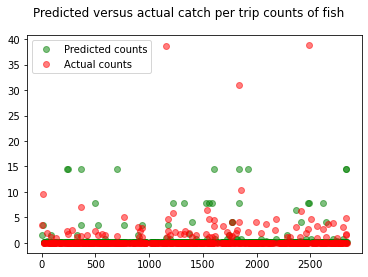

In [108]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['CatchPerTrip']
fig = plt.figure()
fig.suptitle('Predicted versus actual catch per trip counts of fish')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts', alpha=0.5, linestyle='none') #check
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts', alpha=0.5, linestyle='none')
plt.legend(handles=[predicted, actual])
plt.show()

In [109]:
print('Poisson RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts,actual_counts),2)))))

Poisson RMSE=69.86937722425375


<Figure size 432x288 with 0 Axes>

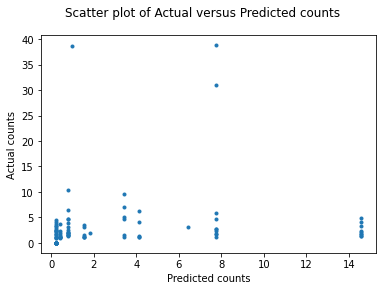

In [110]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

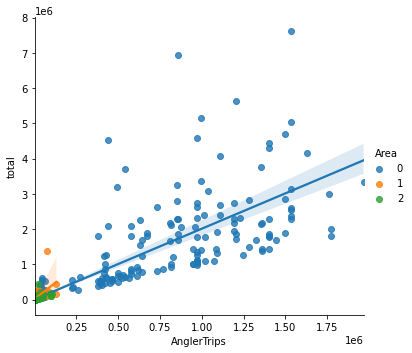

In [111]:
sns.lmplot(x='AnglerTrips', y='total', data=df, hue='Area')
plt.show()

In [ ]:
#zero inflated poisson model

In [112]:
df.groupby('total').count()

,Year,Mode,Area,SpecGroup,AnglerTrips,CatchPerTrip
total,,,,,,
0,2415,2415,2415,2415,2415,2415
29,1,1,1,1,1,1
44,1,1,1,1,1,1
75,1,1,1,1,1,1
241,1,1,1,1,1,1
...,...,...,...,...,...,...
5044856,1,1,1,1,1,1
5163187,1,1,1,1,1,1
5643027,1,1,1,1,1,1


In [113]:
print(len(df[df['CatchPerTrip'] < 1]))

2415


In [114]:
#realized there are a lot of numbers <1 in CatchPerTrip. Since there is no such thing as half a fish, I'm reducing these numbers to zero.
df[df.CatchPerTrip < 1] = 0
df.groupby('CatchPerTrip').count()

,Year,Mode,Area,SpecGroup,AnglerTrips,total
CatchPerTrip,,,,,,
0.000000,2415,2415,2415,2415,2415,2415
1.000000,3,3,3,3,3,3
1.004530,1,1,1,1,1,1
1.007584,1,1,1,1,1,1
1.010653,1,1,1,1,1,1
...,...,...,...,...,...,...
38.800000,1,1,1,1,1,1
45.327911,1,1,1,1,1,1
46.910665,1,1,1,1,1,1


In [128]:
mask = np.random.rand(len(df)) < 0.8
df_train2 = df[mask]
df_test2 = df[~mask]
print('Training data set length='+str(len(df_train2)))
print('Testing data set length='+str(len(df_test2)))

Training data set length=2295
Testing data set length=553


In [129]:
expr2 = 'CatchPerTrip ~ Mode + Area'

In [130]:
y_train2, X_train2 = dmatrices(expr2, df_train2, return_type='dataframe')
y_test2, X_test2 = dmatrices(expr2, df_test2, return_type='dataframe')

In [131]:
zip_training_results = sm.ZeroInflatedPoisson(endog=y_train2, exog=X_train2, exog_infl=X_train2, inflation='logit').fit()

         Current function value: 0.789021
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [132]:
print(zip_training_results.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:            CatchPerTrip   No. Observations:                 2295
Model:             ZeroInflatedPoisson   Df Residuals:                     2292
Method:                            MLE   Df Model:                            2
Date:                 Wed, 03 Feb 2021   Pseudo R-squ.:                  0.3456
Time:                         13:14:24   Log-Likelihood:                -1810.8
converged:                       False   LL-Null:                       -2767.2
Covariance Type:             nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     3.2626      0.120     27.153      0.000       3.027       3.498
inflate_Mode        -20.4337    880.135     -0.023      0.981   -1745.467    1704.600
inflate_Area    

In [134]:
zip_predictions = zip_training_results.predict(X_test2,exog_infl=X_test2)
predicted_counts2=np.round(zip_predictions)
actual_counts2 = y_test2['CatchPerTrip']

print('ZIP RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts2,actual_counts2),2)))))

ZIP RMSE=39.710726510762996


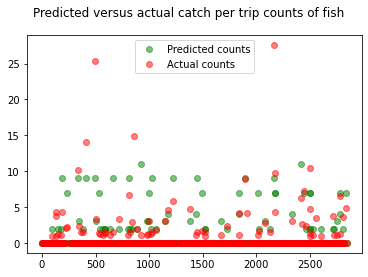

In [135]:
fig = plt.figure()
fig.suptitle('Predicted versus actual catch per trip counts of fish')
predicted, = plt.plot(X_test2.index, predicted_counts2, 'go-', label='Predicted counts', alpha=0.5, linestyle='none') #check
actual, = plt.plot(X_test2.index, actual_counts2, 'ro-', label='Actual counts', alpha=0.5, linestyle='none')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

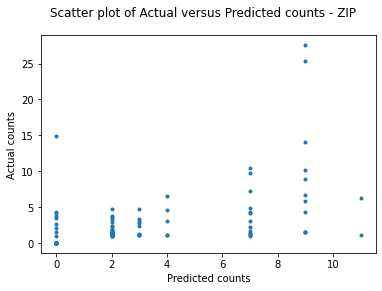

In [136]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts - ZIP')
plt.scatter(x=predicted_counts2, y=actual_counts2, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()